# Курсовой проект

По дисциплине "Интеллектуальный анализ и обработка данных".

Выполнили: ст. гр. 4230М А.Н. Секунов, Д.А. Фомин.

## Содержание
1. [Задание](#task)
2. [ Исходные данные](#initial_data)  
    2.1. [Загрузка исходных данных](#load_data)  
    2.2. [Ознакомление с данными](#viewing_data)  
        2.2.1. [Поле "Attack type" в размеченных данных](#fg1)  
        2.2.2. [Основные характеристики каждого вектора сетевого подключения](#fg2)  
            [0) duration](#f0)  
            [1) protocol_type](#f1)  
            [2) service](#f2)  
            [3) flag](#f3)  
            [4) src_bytes](#f4)  
            [5) dst_bytes](#f5)  
            [6) land](#f6)  
            [7) wrong_fragment](#f7)  
            [8) urgent](#f8)  
        2.2.3. [Контентные характеристики каждого вектора сетевого подключения](#fg3)  
            [9) hot](#f9)  
            [10) num_failed_logins](#f10)  
            [11) logged_in](#f11)  
            [12) num_compromised](#f12)  
            [13) root_shell](#f13)  
            [14) su_attempted](#f14)  
            [15) num_root](#f15)  
            [16) num_file_creations](#f16)  
            [17) num_shells](#f17)  
            [18) num_access_files](#f18)  
            [19) num_outbound_cmds](#f19)  
            [20) is_host_login](#f20)  
            [21) is_guest_login](#f21)  
        2.2.4. [Временные характеристики трафика каждого вектора сетевого соединения](#fg4)  
            [22) count](#f22)  
            [23) srv_count](#f23)  
            [24) serror_rate](#f24)  
            [25) srv_serror_rate](#f25)  
            [26) rerror_rate](#f26)  
            [27) srv_rerror_rate](#f27)  
            [28) same_srv_rate](#f28)  
            [29) diff_srv_rate](#f29)  
            [30) srv_diff_host_rate](#f30)  
        2.2.5. [Особенности трафика на основе хоста в векторе сетевого соединения](#fg5)  
            [31) dst_host_count](#f31)  
            [32) dst_host_srv_count](#f32)  
            [33) dst_host_same_srv_rate](#f33)  
            [34) dst_host_diff_srv_rate](#f34)  
            [35) dst_host_same_src_port_rate](#f35)  
            [36) dst_host_srv_diff_host_rate](#f36)  
            [37) dst_host_serror_rate](#f37)  
            [38) dst_host_srv_serror_rate](#f38)  
            [39) dst_host_rerror_rate](#f39)  
            [40) dst_host_srv_rerror_rate](#f40)  
        2.2.6. [Общий итог по анализу данных](#fg6)  
3. [Выводы](#conclusions)
4. [Список литературы](#references)

## 1. Задание <a id="task"></a>

1.
    1. Для вариантов 1-20 дан многомерный набор данных телеметрической информации (ТМИ) малого космического аппарата, полученный в результате  предобработки и разметки в ЛР3. Разработать приложение на языке Python и  необходимых библиотек машинного и глубокого обучения на основе  классификационной модели, заданной в варианте, которое определяет техническое  состояние малого космического аппарата: штатное ф-е, отказ, сбой, на основе  данных его ТМИ.
    2. Для вариантов 21-40 дан многомерный набор данных сетевого трафика. Разработать приложение на языке Python и необходимых библиотек машинного и глубокого обучения на основе классификационной модели, заданной в варианте, х, которое определяет попытки сетевых вторжений на основе данных сетевого трафика.
2. Выполнить разведочный анализ данных как в ЛР.
3. Анализ выполняется для исходного набора данных и преобразованного исходного набора данных, который Вы подбираете самостоятельно с целью получения лучшей точности классификации.
4. Проверить набор данных на сбалансированность классов. В случае несбалансированного набора данных помимо “Classification report” с основными метриками: Accuracy, Precision, Recall, F1-score, также оценивать balanced_accuracy_score. Также оценивать и анализировать ROC_AUC_score.
5. Для выбранной комбинации набора данных и предиктивной модели выполняется поиск гиперпараметров с помощью генетического алгоритма. Реализовывать ГА можно самостоятельно или воспользоваться библиотекой DEAP (https://deap.readthedocs.io/en/master/index.html). 
  Для выбранной комбинации набора данных и предиктивной модели выполняется поиск гиперпараметров методом greedsearch. Сравнить полученные результаты.
  Во все НС классификационные модели добавить слой регуляризации Dropuot().
  Сохранять лог всех генерируемых НС моделей в популяции.
  Гиперпараметры: число сверточных фильтров в сверточных слоях, размер свертки в сверточных слоях, число нейронов в рекуррентных слоях,  число нейронов в полносвязных слоях, параметр в слое Dropuot(), алгоритм обучения.
6. На неразмеченной части набора данных выполнить предобучение с помощью автокодировщика, построенного на основании базового нейросетевого классификатора, заданного в варинте. Выполнить точную настройку (дообучение) базовой нейронной сети на размеченном наборе данных.
7. Сделать выводы по проведенному анализу.

**Вариант 28**

Гибридная нейросетевая модель: последовательностное соединение  одномерных сверточных и рекуррентных двунаправленных (Bidirectional layer)  нейросетевых слоев с полносвязным классификатором: самостоятельная реализация.

## 2. Исходные данные <a id="initial_data"></a>

В качестве исходных данных используется датасет на основе KDD [[1](#l1)], [[2](#l2)]. 

Используемые файлы:

 - kdd_10000_labeled.csv - выборка из 10К записей с меткой атаки (https://github.com/Demetrey/DMaP/blob/CP/CP/datasets/kdd_10000_labeled.csv);
 - kdd_50000_unlabeled.csv - выборка из 50К записей без метки атаки (https://github.com/Demetrey/DMaP/blob/CP/CP/datasets/kdd_50000_unlabeled.csv);
 - Field Names.csv - наименования полей (https://github.com/defcom17/NSL_KDD/blob/master/Field%20Names.csv).

Набор данных NSL-KDD содержит 4 категории угроз [[3](#l3)]:

 - Denial of Service (dos). Набор атак, в которых злоумышленник ограничивает доступ верифицированным пользователям к конкретному сервису через определенный протокол (Back, Land, Neptune, Pod, Smurf, Teardrop, Apache2, Udpstorm, Processtable, Worm);
 - Remote to Local (r2l). Набор атак, в которых злоумышленник пытается получить доступ извне к локальной машине пользователя (Guess_Password, Ftp_write, Imap, Phf, Multihop, Warezmaster, Warezclient, Spy, Xlock, Xsnoop, Snmpguess, Snmpgetattack, Httptunnel, Sendmail, Named);
 - User to Root (u2r). Набор атак, в которых злоумышленник, имея доступ к машине жертвы, пытается получить права более привилегированного пользователя (Buffer_overflow, Loadmodule, Rootkit, Perl, Sqlattack, Xterm, Ps);
 - Probe. Набор атак, в которых злоумышленник пытается получить сведения об инфраструктуре пользователя (Satan, Ipsweep, Nmap, Portsweep, Mscan, Saint).

Заданные выборки предназначены для двоичной классификации: наличие угрозы / отсутствие угрозы (normal).

Размерность вектра составляет 42 (41 атрибут, нименования которых хранится в файле Field Names.csv, 42-ой атрибут представляет собой тип атаки).
43 атрибут NSL-KDD был исключен.

### 2.1. Загрузка исходных данных <a id="load_data"></a>

In [1]:
import urllib.request
import os

save_path = './datasets'
download_path = './datasets/download'
dataset_url = 'https://raw.githubusercontent.com/Demetrey/DMaP/CP/CP/datasets/'
fnames_url = 'https://raw.githubusercontent.com/defcom17/NSL_KDD/master/Field%20Names.csv'
urls = { 'kdd_10000_labeled': dataset_url + 'kdd_10000_labeled.csv',
         'kdd_50000_unlabeled': dataset_url + 'kdd_50000_unlabeled.csv' }

if not os.path.exists(save_path):
    os.mkdir(save_path)

for key in urls:
    file_name = os.path.join(save_path, key + '.csv')
    urllib.request.urlretrieve(urls[key], file_name)

# download fields
if not os.path.exists(download_path):
    os.mkdir(download_path)

_ = urllib.request.urlretrieve(fnames_url, os.path.join(download_path, 'fields.csv'))

Объединение заголовков и данных

In [2]:
import pandas as pd
import numpy as np
fnames = pd.read_csv('./datasets/download/fields.csv', header=None)[0].to_numpy()

# Для размеченных данных
data_10k = pd.read_csv('./datasets/kdd_10000_labeled.csv')
data_10k.columns = np.append(fnames, 'Attack type')

# Для неразмеченных данных
data_50k = pd.read_csv('./datasets/kdd_50000_unlabeled.csv')
data_50k.columns = fnames

### 2.2. Ознакомление с данными <a id="viewing_data"></a>
Вывод общих сведений о наборах

In [3]:
data_10k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     10000 non-null  int64  
 1   protocol_type                10000 non-null  object 
 2   service                      10000 non-null  object 
 3   flag                         10000 non-null  object 
 4   src_bytes                    10000 non-null  int64  
 5   dst_bytes                    10000 non-null  int64  
 6   land                         10000 non-null  int64  
 7   wrong_fragment               10000 non-null  int64  
 8   urgent                       10000 non-null  int64  
 9   hot                          10000 non-null  int64  
 10  num_failed_logins            10000 non-null  int64  
 11  logged_in                    10000 non-null  int64  
 12  num_compromised              10000 non-null  int64  
 13  root_shell       

In [4]:
data_50k.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 41 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     50000 non-null  int64  
 1   protocol_type                50000 non-null  object 
 2   service                      50000 non-null  object 
 3   flag                         50000 non-null  object 
 4   src_bytes                    50000 non-null  int64  
 5   dst_bytes                    50000 non-null  int64  
 6   land                         50000 non-null  int64  
 7   wrong_fragment               50000 non-null  int64  
 8   urgent                       50000 non-null  int64  
 9   hot                          50000 non-null  int64  
 10  num_failed_logins            50000 non-null  int64  
 11  logged_in                    50000 non-null  int64  
 12  num_compromised              50000 non-null  int64  
 13  root_shell      

Как видно, пустые значения в наборах отсутствуют.

#### 2.2.1. Поле "Attack type" в размеченных данных <a id="fg1"></a>
В размеченном наборе *data_10k* присутствет дополнительное атрибут (*41. Attack type*), который указывает состояние соединения в даннным момент времени: имеется ли атака или нет.

In [5]:
data_10k['Attack type'].value_counts()

Attack type
normal.             7787
smurf.              2207
buffer_overflow.       2
neptune.               2
loadmodule.            1
perl.                  1
Name: count, dtype: int64

Так как решается задача двоичной классификации, то всем записям со значением "*normal*" будет присвоено значение *0*, а всем остальным *1*.

In [6]:
Y = pd.Series(1, index=np.arange(data_10k.shape[0]))
Y[data_10k['Attack type'] == 'normal.'] = 0
Y.value_counts()

0    7787
1    2213
Name: count, dtype: int64

В следующих разделах приводится описание остальных атрибутов [[4](#l4)], которые можно разделить на:

In [7]:
# Категории
category_fn = data_50k.columns[[1, 2, 3]]
# Логические значения (1 - Да, 0 - Нет)
boolean_fn = data_50k.columns[[6, 11, 13, 14, 20, 21]]
# Числовые значения
number_fn = data_50k.columns.drop(category_fn).drop(boolean_fn)

Далее приводятся вспомогательные функции для отображения информации об определённом атрибуте:

In [8]:
from IPython.display import display, Markdown, HTML

info_cols = [
    'data_10k',
    '[Y=1] data_10k',
    '[Y=0] data_10k',
    'data_50k'
]

# Формирование статистики
def get_df(fn, func):
    df = pd.concat([
        func(data_10k[fn]),             # Все для размеченных
        func(data_10k[fn][Y==1]),       # Только с атаками
        func(data_10k[fn][Y==0]),       # Только "нормальные"
        func(data_50k[fn])], axis=1)    # Все для неразмеченных
    df.columns = info_cols
    return df

# Для заметного выделения
def print_warning(msg):
    display(HTML(f'<b style="color:orangered">{msg}</b>'))

# Для выявления ненужных атрибутов (числовых)
def min_eq_max(df, fn):
    res = df[fn]['min'] == df[fn]['max']
    if res:
        print_warning(f'"{fn}" не имеет уникальных значений!')
    return res

# Для выявления ненужных атрибутов (логических)
def check_boolean(df, fn, max_count):
    с1 = df[fn][1] if 1 in df.index else 0
    с0 = df[fn][0] if 0 in df.index else 0
    if с1 == max_count:
        print_warning(f'"{fn}" имеет только значение равное 1!')
    elif с0 == max_count:
        print_warning(f'"{fn}" имеет только значение равное 0!')
    elif с1 + с0 != max_count:
        print_warning(f'"{fn}" имеет еще какие-то значения, кроме 0 и 1!')

# Отображает информацию о конкретном атрибуте
def show_info(fn):
    if fn in category_fn:
        display(Markdown('**Тип:** категория.'))
        df = get_df(fn, pd.Series.value_counts)
        for i in range(0, df.shape[0], 10):
            display(df.T.iloc[:, i:i+10].dropna(how='all'))
        # Подсчёт атриубтов, которых нет в data_10k
        сount_nan = df[info_cols[0]].isna().sum()
        if сount_nan:
            print_warning(f"В наборе {info_cols[3]} имеются " + 
                f"{сount_nan} категорий, которых нет в {info_cols[0]}!")
    elif fn in boolean_fn:
        display(Markdown('**Тип:** логическое значение (1 - Да, 0 - Нет).'))
        df = get_df(fn, pd.Series.value_counts)
        display(df.T)
        # Проверка, что имеются значения 0 и 1, и больше никаких
        check_boolean(df, info_cols[0], data_10k.shape[0])
        check_boolean(df, info_cols[3], data_50k.shape[0])    
    else:
        display(Markdown(f'**Тип:** числовое значение ({data_50k[fn].dtype}).'))
        df = get_df(fn, pd.DataFrame.describe)
        display(df.T.round(2))
        # Проверка, что есть уникальные значения
        if not min_eq_max(df, info_cols[0]):
            _ = min_eq_max(df, info_cols[1])
            _ = min_eq_max(df, info_cols[2])
        _ = min_eq_max(df, info_cols[3])

Дополнительные функции

In [9]:
import matplotlib.pyplot as plt

# Для отображения информации с исключением значения
def show_not_value(fn, value, index=None):
    d10k = data_10k[fn]
    d50k = data_50k[fn]
    d10k = d10k[d10k != value]
    d50k = d50k[d50k != value]
    df = pd.concat([
        pd.DataFrame.describe(d10k),             # Все для размеченных
        pd.DataFrame.describe(d10k[Y==1]),       # Только с атаками
        pd.DataFrame.describe(d10k[Y==0]),       # Только "нормальные"
        pd.DataFrame.describe(d50k)], axis=1)    # Все для неразмеченных
    df.columns = info_cols
    if index:
        display(pd.DataFrame(df.iloc[:, index]).T.round(2))
    else:
        display(df.T.round(2))

# Для вывода информации о ненуливых значениях
def show_not_zero(fn, index=None):
    display(Markdown('**Если убрать нулевые значения:**'))
    show_not_value(fn, 0, index)

# Для вывода информации о неединичных значениях
def show_not_one(fn, index=None):
    display(Markdown('**Если убрать единичные значения:**'))
    show_not_value(fn, 1, index)

# Вывод наиболее линейно-связанных числовых значений
corr_data_10k = data_10k[number_fn].corr()
corr_data_50k = data_50k[number_fn].corr() 
def show_linearly_related(fn, n = 5):
    d10k = corr_data_10k[fn].sort_values(ascending=False, key=lambda x: abs(x))
    d50k = corr_data_50k[fn].sort_values(ascending=False, key=lambda x: abs(x))
    display(Markdown(f'**Наиболее линейно-зависимые атрибуты к "{fn}":**'))
    display(pd.DataFrame({'data_10k':d10k[1:n+1]}).T.round(2))
    display(pd.DataFrame({'data_50k':d50k[1:n+1]}).T.round(2))

# Отображение гистограмм
def show_hist(fn, d1_bist=100, d5_bist=100, 
    d1_from=None, d5_from=None, d1_to=None, d5_to=None):
    d10k = data_10k[fn]
    d50k = data_50k[fn]
    if d1_from: d10k = d10k[d10k >= d1_from]
    if d5_from: d50k = d50k[d50k >= d5_from]
    if d1_to: d10k = d10k[d10k <= d1_to]
    if d5_to: d50k = d50k[d50k <= d5_to]
    f, (ax1, ax2) = plt.subplots(1, 2)
    f.set_figheight(3)
    f.set_figwidth(9)
    d10k.hist(ax=ax1, bins=d1_bist)
    d50k.hist(ax=ax2, bins=d5_bist)
    ax1.set_title(info_cols[0])
    ax2.set_title(info_cols[3])
    ax1.set_ylabel('Кол-во соединений')
    ax1.set_xlabel(fn)
    ax2.set_xlabel(fn)

#### 2.2.2. Основные характеристики каждого вектора сетевого подключения <a id="fg2"></a>

**0) duration:** <a id="f0"></a>длительность соединения.

In [10]:
show_info('duration')
show_not_zero('duration')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,2.68,164.81,0.0,0.0,0.0,0.0,12454.0
[Y=1] data_10k,2213.0,0.27,7.77,0.0,0.0,0.0,0.0,305.0
[Y=0] data_10k,7787.0,3.37,186.72,0.0,0.0,0.0,0.0,12454.0
data_50k,50000.0,3.21,184.88,0.0,0.0,0.0,0.0,25602.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,269.0,99.68,1001.84,1.0,1.0,1.0,6.00,12454.0
[Y=1] data_10k,4.0,148.25,123.61,25.0,65.5,131.5,214.25,305.0
[Y=0] data_10k,265.0,98.94,1009.30,1.0,1.0,1.0,5.00,12454.0
data_50k,1650.0,97.37,1013.50,1.0,1.0,3.0,15.00,25602.0


*Комментарий*: только 4 записи с атаками длились 1 и более секунд, т. е. данное поле недостаточно информативно для выявление атаки.  
[Перейти к итогам](#fg6)

**1) protocol_type:** <a id="f1"></a>протокол, используемый в соединении.

In [11]:
show_info('protocol_type')

**Тип:** категория.

protocol_type,tcp,icmp,udp
data_10k,7622.0,2233.0,145.0
[Y=1] data_10k,6.0,2207.0,NaN
[Y=0] data_10k,7616.0,26.0,145.0
data_50k,38756.0,9831.0,1413.0


*Комментарий*: c атакой связаны только ICMP-пакеты, TCP имеют только 6 атак, а UDP совсем отсутсвуют. Не ясно как это повлияет на обучение.  
[Перейти к итогам](#fg6)

**2) service:** <a id="f2"></a>используемая служба сети назначения.

In [12]:
show_info('service')

**Тип:** категория.

service,http,ecr_i,smtp,domain_u,finger,ftp,ntp_u,auth,telnet,eco_i
data_10k,6947.0,2225.0,571.0,128.0,40.0,28.0,17.0,15.0,13.0,8.0
[Y=1] data_10k,NaN,2207.0,NaN,NaN,NaN,NaN,NaN,NaN,6.0,NaN
[Y=0] data_10k,6947.0,18.0,571.0,128.0,40.0,28.0,17.0,15.0,7.0,8.0
data_50k,27893.0,9161.0,2637.0,1146.0,137.0,142.0,141.0,82.0,129.0,670.0


service,other,private,ftp_data,pop_3,time,gopher,rje,sunrpc,whois,hostnames
data_10k,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
[Y=0] data_10k,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_50k,13.0,6371.0,1095.0,38.0,16.0,13.0,12.0,12.0,11.0,10.0


service,csnet_ns,domain,link,login,netbios_dgm,ssh,mtp,sql_net,uucp_path,pop_2
data_50k,10.0,10.0,10.0,9.0,9.0,9.0,9.0,8.0,8.0,8.0


service,bgp,systat,iso_tsap,supdup,shell,imap4,http_443,nntp,klogin,remote_job
data_50k,8.0,8.0,8.0,8.0,8.0,8.0,8.0,7.0,7.0,7.0


service,vmnet,discard,netbios_ssn,netbios_ns,daytime,ctf,Z39_50,name,efs,courier
data_50k,7.0,7.0,7.0,7.0,7.0,6.0,6.0,6.0,6.0,6.0


service,uucp,exec,printer,echo,kshell,ldap,nnsp,netstat,IRC
data_50k,6.0,5.0,5.0,5.0,5.0,5.0,4.0,3.0,1.0


*Комментарий*: с атаками больше связана служба ecr_i и только 6 атак приходятся на telnet. Не ясно как это повлияет на обучение.  
[Перейти к итогам](#fg6)

**3) flag:** <a id="f3"></a>состояние соединения - нормальное или ошибка.

In [13]:
show_info('flag')

**Тип:** категория.

flag,SF,REJ,S1,S0,S2,SH,RSTR,RSTO,RSTOS0,S3
data_10k,9983.0,8.0,6.0,2.0,1.0,NaN,NaN,NaN,NaN,NaN
[Y=1] data_10k,2211.0,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN
[Y=0] data_10k,7772.0,8.0,6.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
data_50k,42059.0,1222.0,21.0,6436.0,5.0,103.0,89.0,51.0,10.0,3.0


flag,OTH
data_50k,1.0


*Комментарий*: атаки связаны с флагом SF и только 2 случая с S0. Не ясно как это повлияет на обучение.  
[Перейти к итогам](#fg6)

**4) src_bytes:** <a id="f4"></a>
количество байт данных, переданных от источника к получателю в одном соединении.

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,514.46,687.75,0.0,222.0,293.0,1032.0,19721.0
[Y=1] data_10k,2213.0,1030.92,42.51,0.0,1032.0,1032.0,1032.0,1735.0
[Y=0] data_10k,7787.0,367.69,713.84,0.0,215.0,249.0,314.0,19721.0
data_50k,50000.0,16940.21,3100986.65,0.0,198.0,276.0,1032.0,693375640.0


**Наиболее линейно-зависимые атрибуты к "src_bytes":**

,count,srv_count,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_diff_srv_rate
data_10k,0.39,0.39,0.36,-0.17,0.16


,diff_srv_rate,same_srv_rate,dst_host_same_srv_rate,dst_host_srv_count,dst_host_srv_rerror_rate
data_50k,0.03,-0.01,-0.01,-0.01,0.01


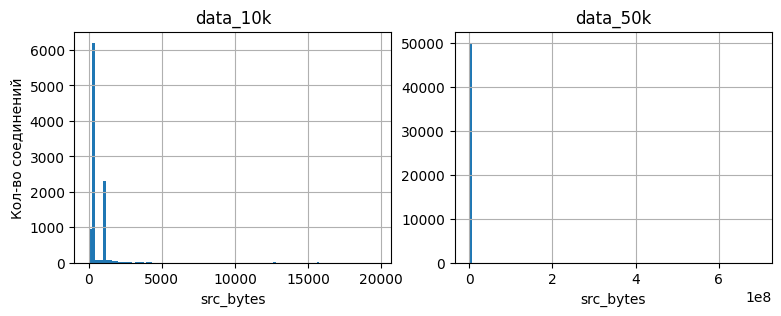

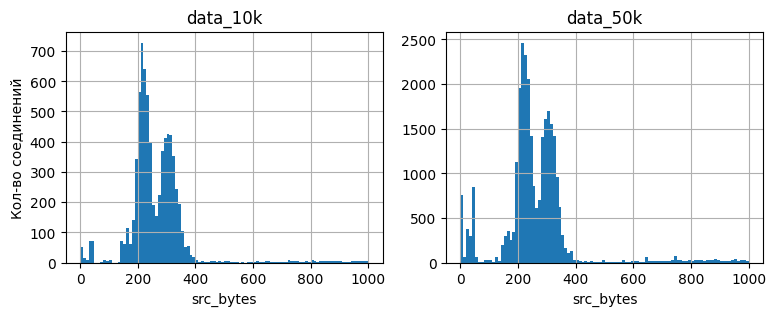

In [14]:
show_info('src_bytes')
show_hist('src_bytes')
show_hist('src_bytes', d1_to=1000, d5_from=1, d5_to=1000)
show_linearly_related('src_bytes')

*Комментарий*: "src_bytes" не имеет сильной линейной связи с другими атрибутами. Имеются значения с сильным разбросом (осбенно в data_50k). Данные кучуются в районе 170-400 байт.  
[Перейти к итогам](#fg6)

**5) dst_bytes:** <a id="f5"></a>количество байт данных, переданных от адресата к источнику в одном соединении.

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,3276.09,8775.83,0.0,237.75,891.0,2739.25,271733.0
[Y=1] data_10k,2213.0,4.23,103.05,0.0,0.00,0.0,0.00,2957.0
[Y=0] data_10k,7787.0,4205.93,9746.52,0.0,497.50,1471.0,3857.00,271733.0
data_50k,50000.0,3232.55,32113.59,0.0,0.00,354.0,2227.00,2661605.0


**Наиболее линейно-зависимые атрибуты к "dst_bytes":**

,count,srv_count,dst_host_same_src_port_rate,dst_host_count,src_bytes
data_10k,-0.2,-0.2,-0.17,-0.15,-0.13


,count,srv_count,dst_host_same_src_port_rate,dst_host_srv_serror_rate,dst_host_serror_rate
data_50k,-0.06,-0.05,-0.05,-0.04,-0.04


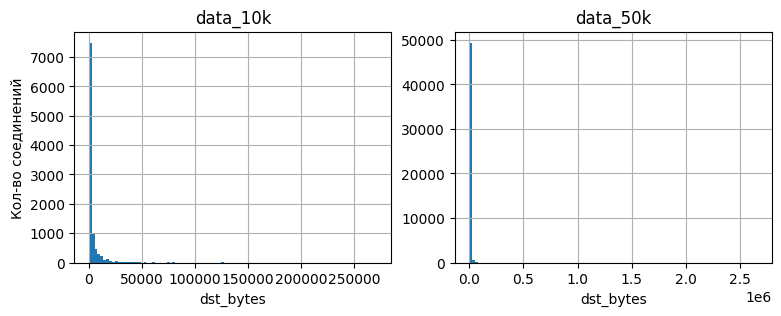

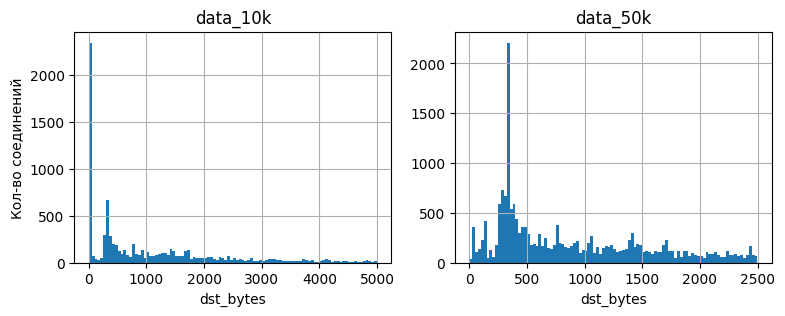

In [15]:
show_info('dst_bytes')
show_hist('dst_bytes')
show_hist('dst_bytes', d1_to=5000, d5_from=1, d5_to=2500)
show_linearly_related('dst_bytes')

*Комментарий*: в "dst_bytes" отсутствует какая-либо линейная связь с другими атрибутами. Имеются значения с сильным разбросом (осбенно в data_50k).  
[Перейти к итогам](#fg6)

**6) land:** <a id="f6"></a>IP-адреса и номера портов источника и назначения равны?

In [16]:
show_info('land')

**Тип:** логическое значение (1 - Да, 0 - Нет).

land,0,1
data_10k,10000.0,NaN
[Y=1] data_10k,2213.0,NaN
[Y=0] data_10k,7787.0,NaN
data_50k,49999.0,1.0


*Комментарий*: хоть в data_50k имеется одна запись с 1, будем считать, что данный атрибут не имеет уникальных значений, а значит в дальнейшем его можно не рассматривать.  
[Перейти к итогам](#fg6)

**7) wrong_fragment:** <a id="f7"></a>общее количество ошибочных фрагментов в данном соединении.

In [17]:
show_info('wrong_fragment')
show_not_zero('wrong_fragment', index=3)

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
data_50k,50000.0,0.01,0.13,0.0,0.0,0.0,0.0,3.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_50k,119.0,2.65,0.77,1.0,3.0,3.0,3.0,3.0


*Комментарий*: скорее всего данный атрибут можно не рассматривать при обучении.  
[Перейти к итогам](#fg6)

**8) urgent:** <a id="f8"></a>количество срочных пакетов в данном соединении. Срочные пакеты - это пакеты с активированным битом срочности.

In [18]:
show_info('urgent')
show_not_zero('urgent', index=3)

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
[Y=1] data_10k,2213.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
data_50k,50000.0,0.0,0.01,0.0,0.0,0.0,0.0,2.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_50k,2.0,1.5,0.71,1.0,1.25,1.5,1.75,2.0


*Комментарий*: скорее всего данный атрибут можно не рассматривать при обучении.  
[Перейти к итогам](#fg6)

#### 2.2.3. Контентные характеристики каждого вектора сетевого подключения <a id="fg3"></a>

**9) hot:** <a id="f9"></a>количество "особых" индикаторов в содержимом, таких как: вход в системный каталог, создание программ и выполнение программ.

In [19]:
show_info('hot')
show_not_zero('hot')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.04,0.84,0.0,0.0,0.0,0.0,30.0
[Y=1] data_10k,2213.0,0.00,0.10,0.0,0.0,0.0,0.0,3.0
[Y=0] data_10k,7787.0,0.05,0.95,0.0,0.0,0.0,0.0,30.0
data_50k,50000.0,0.11,0.80,0.0,0.0,0.0,0.0,30.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,47.0,7.94,9.46,1.0,1.0,4.0,10.0,30.0
[Y=1] data_10k,3.0,2.67,0.58,2.0,2.5,3.0,3.0,3.0
[Y=0] data_10k,44.0,8.30,9.68,1.0,1.0,4.0,14.0,30.0
data_50k,2214.0,2.46,2.92,1.0,2.0,2.0,2.0,30.0


*Комментарий*: для "hot" в наборе data_10k содержаться только 3 атаки и скорее всего атрибут не подойдет для обучения.  
[Перейти к итогам](#fg6)

**10) num_failed_logins:** <a id="f10"></a>количество неудачных попыток входа в систему.

In [20]:
show_info('num_failed_logins')
show_not_zero('num_failed_logins', index=3)

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
[Y=1] data_10k,2213.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
data_50k,50000.0,0.0,0.04,0.0,0.0,0.0,0.0,5.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_50k,57.0,1.14,0.67,1.0,1.0,1.0,1.0,5.0


*Комментарий*: скорее всего данный атрибут можно не рассматривать при обучении.  
[Перейти к итогам](#fg6)

**11) logged_in:** <a id="f11"></a>вход в систему прошёл успешно?

In [21]:
show_info('logged_in')

**Тип:** логическое значение (1 - Да, 0 - Нет).

logged_in,1,0
data_10k,7570,2430
[Y=1] data_10k,4,2209
[Y=0] data_10k,7566,221
data_50k,30590,19410


*Комментарий*: получается, что если не было успешного входа в систему, то с высокой вероятностью была атака.  
[Перейти к итогам](#fg6)

**12) num_compromised:** <a id="f12"></a>количество состояний "compromised".

In [22]:
show_info('num_compromised')
show_not_zero('num_compromised')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.04,0.0,0.0,0.0,0.0,2.0
[Y=1] data_10k,2213.0,0.00,0.06,0.0,0.0,0.0,0.0,2.0
[Y=0] data_10k,7787.0,0.00,0.03,0.0,0.0,0.0,0.0,2.0
data_50k,50000.0,0.05,3.44,0.0,0.0,0.0,0.0,767.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,5.0,1.60,0.55,1.0,1.00,2.0,2.00,2.0
[Y=1] data_10k,3.0,1.67,0.58,1.0,1.50,2.0,2.00,2.0
[Y=0] data_10k,2.0,1.50,0.71,1.0,1.25,1.5,1.75,2.0
data_50k,1955.0,1.41,17.33,1.0,1.00,1.0,1.00,767.0


*Комментарий*: в размеченном наборе, только 3 состояниям соотвествуют атаки и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**13) root_shell:** <a id="f13"></a>получен ли root shell?

In [23]:
show_info('root_shell')

**Тип:** логическое значение (1 - Да, 0 - Нет).

root_shell,0,1
data_10k,9991,9
[Y=1] data_10k,2209,4
[Y=0] data_10k,7782,5
data_50k,49989,11


*Комментарий*: выходит, что атрибут не дает определить наличие атаки в соединении.  
[Перейти к итогам](#fg6)

**14) su_attempted:** <a id="f14"></a>была ли попытка использовать "su root"?

In [24]:
show_info('su_attempted')

**Тип:** логическое значение (1 - Да, 0 - Нет).

su_attempted,0,1,2
data_10k,10000.0,NaN,NaN
[Y=1] data_10k,2213.0,NaN,NaN
[Y=0] data_10k,7787.0,NaN,NaN
data_50k,49998.0,1.0,1.0


*Комментарий*: поскольку в data_50k имеется только одна 1 и при этом есть опечатка (2), то будем считать, что данный атрибут не имеет уникальных значений, а значит в дальнейшем его можно не рассматривать.  
[Перейти к итогам](#fg6)

**15) num_root:** <a id="f15"></a>количество обращений к "root" или количество операций, выполненных от имени "root" в соединении.

In [25]:
show_info('num_root')
show_not_zero('num_root')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.0,2.0
[Y=1] data_10k,2213.0,0.00,0.04,0.0,0.0,0.0,0.0,2.0
[Y=0] data_10k,7787.0,0.00,0.02,0.0,0.0,0.0,0.0,2.0
data_50k,50000.0,0.03,3.85,0.0,0.0,0.0,0.0,857.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,2.0,2.00,0.00,2.0,2.0,2.0,2.00,2.0
[Y=1] data_10k,1.0,2.00,NaN,2.0,2.0,2.0,2.00,2.0
[Y=0] data_10k,1.0,2.00,NaN,2.0,2.0,2.0,2.00,2.0
data_50k,178.0,8.93,64.02,1.0,1.0,2.0,8.25,857.0


*Комментарий*: только одному обращению соответствует атака, скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**16) num_file_creations:** <a id="f16"></a>количество операций создания файлов в соединении.

In [26]:
show_info('num_file_creations')
show_not_zero('num_file_creations')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.06,0.0,0.0,0.0,0.0,4.0
[Y=1] data_10k,2213.0,0.0,0.10,0.0,0.0,0.0,0.0,4.0
[Y=0] data_10k,7787.0,0.0,0.04,0.0,0.0,0.0,0.0,2.0
data_50k,50000.0,0.0,0.17,0.0,0.0,0.0,0.0,28.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,10.0,1.60,0.97,1.0,1.0,1.0,2.00,4.0
[Y=1] data_10k,4.0,2.00,1.41,1.0,1.0,1.5,2.50,4.0
[Y=0] data_10k,6.0,1.33,0.52,1.0,1.0,1.0,1.75,2.0
data_50k,75.0,2.03,3.94,1.0,1.0,1.0,1.00,28.0


*Комментарий*: только 4 операциям соответствует атака и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**17) num_shells:** <a id="f17"></a>количество запросов оболочки.

In [27]:
show_info('num_shells')
show_not_zero('num_shells')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.02,0.0,0.0,0.0,0.0,2.0
[Y=1] data_10k,2213.0,0.0,0.05,0.0,0.0,0.0,0.0,2.0
[Y=0] data_10k,7787.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
data_50k,50000.0,0.0,0.01,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,2.0,1.5,0.71,1.0,1.25,1.5,1.75,2.0
[Y=1] data_10k,2.0,1.5,0.71,1.0,1.25,1.5,1.75,2.0
[Y=0] data_10k,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
data_50k,11.0,1.0,0.00,1.0,1.00,1.0,1.00,1.0


*Комментарий*: только 2 запроса соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**18) num_access_files:** <a id="f18"></a>количество операций над файлами контроля доступа.

In [28]:
show_info('num_access_files')
show_not_zero('num_access_files', index=[2, 3])

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.04,0.0,0.0,0.0,0.0,2.0
[Y=1] data_10k,2213.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.0,0.05,0.0,0.0,0.0,0.0,2.0
data_50k,50000.0,0.0,0.07,0.0,0.0,0.0,0.0,6.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
[Y=0] data_10k,10.0,1.2,0.42,1.0,1.0,1.0,1.0,2.0
data_50k,163.0,1.1,0.50,1.0,1.0,1.0,1.0,6.0


*Комментарий*: в данном атрибуте нельзя выявить атаку.  
[Перейти к итогам](#fg6)

**19) num_outbound_cmds:** <a id="f19"></a>количество исходящих команд в FTP-сессии.

In [29]:
show_info('num_outbound_cmds')

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[Y=1] data_10k,2213.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
data_50k,50000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


*Комментарий*: атрибут не информативен.  
[Перейти к итогам](#fg6)

**20) is_host_login:** <a id="f20"></a>принадлежит ли логин к списку "особых": root, admin и т. д.?

In [30]:
show_info('is_host_login')

**Тип:** логическое значение (1 - Да, 0 - Нет).

is_host_login,0
data_10k,10000
[Y=1] data_10k,2213
[Y=0] data_10k,7787
data_50k,50000


*Комментарий*: атрибут не информативен.  
[Перейти к итогам](#fg6)

**21) is_guest_login:** <a id="f21"></a>используется «гостевой» логин?

In [31]:
show_info('is_guest_login')

**Тип:** логическое значение (1 - Да, 0 - Нет).

is_guest_login,0,1
data_10k,9972.0,28.0
[Y=1] data_10k,2213.0,NaN
[Y=0] data_10k,7759.0,28.0
data_50k,49865.0,135.0


*Комментарий*: атрибут не позволяет выявить атаку.  
[Перейти к итогам](#fg6)

#### 2.2.4. Временные характеристики трафика каждого вектора сетевого соединения <a id="fg4"></a>

**22) count:** <a id="f22"></a>количество соединений с тем же хостом назначения, что и текущее соединение, за последние две секунды.

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,118.69,207.37,1.0,3.0,9.0,29.0,511.0
[Y=1] data_10k,2213.0,505.24,45.99,1.0,511.0,511.0,511.0,511.0
[Y=0] data_10k,7787.0,8.83,9.02,1.0,2.0,6.0,13.0,80.0
data_50k,50000.0,123.10,193.31,1.0,2.0,11.0,198.0,511.0


**Наиболее линейно-зависимые атрибуты к "count":**

,srv_count,dst_host_same_src_port_rate,dst_host_count,src_bytes,dst_host_srv_diff_host_rate
data_10k,1.0,0.92,0.53,0.39,-0.32


,srv_count,dst_host_same_src_port_rate,dst_host_count,srv_diff_host_rate,dst_host_srv_diff_host_rate
data_50k,0.94,0.79,0.49,-0.25,-0.19


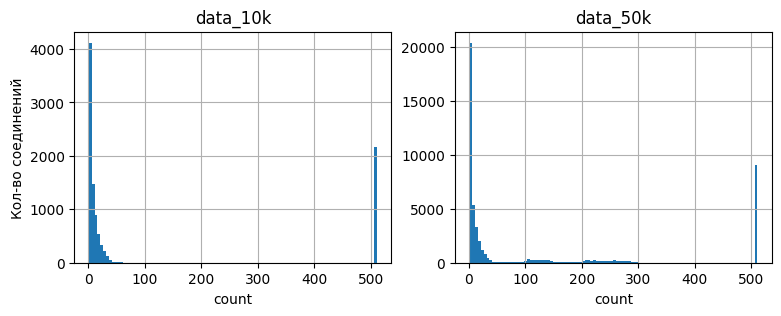

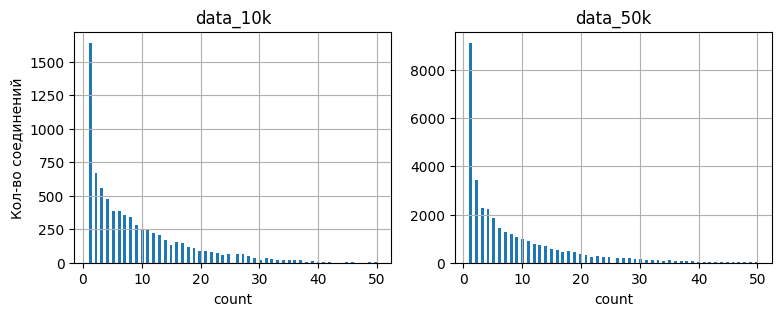

In [32]:
show_info('count')
show_hist('count')
show_hist('count', d1_to=50, d5_to=50)
show_linearly_related('count')

*Комментарий*: большая часть записисей близка к 1. Атакам больше соотвествует значение 511. Полчается, что атрибут взаимозаменяем с   [srv_count](#f23) и хорошо связан с [dst_host_same_src_port_rate](#f35).  
[Перейти к итогам](#fg6)

**23) srv_count:** <a id="f23"></a>количество соединений с тем же сервисом (номер порта) , что и текущее соединение, за последние две секунды.

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,120.52,206.46,1.0,4.0,12.0,35.0,511.0
[Y=1] data_10k,2213.0,505.24,46.00,1.0,511.0,511.0,511.0,511.0
[Y=0] data_10k,7787.0,11.18,10.79,1.0,3.0,8.0,16.0,80.0
data_50k,50000.0,102.37,192.56,1.0,3.0,10.0,29.0,511.0


**Наиболее линейно-зависимые атрибуты к "srv_count":**

,count,dst_host_same_src_port_rate,dst_host_count,src_bytes,dst_host_srv_diff_host_rate
data_10k,1.0,0.92,0.53,0.39,-0.32


,count,dst_host_same_src_port_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate
data_50k,0.94,0.87,0.39,0.28,0.24


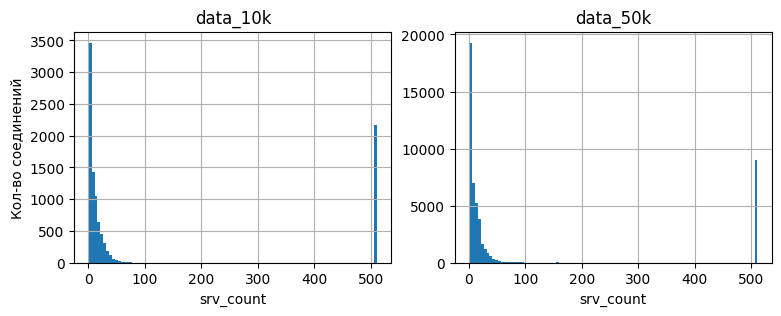

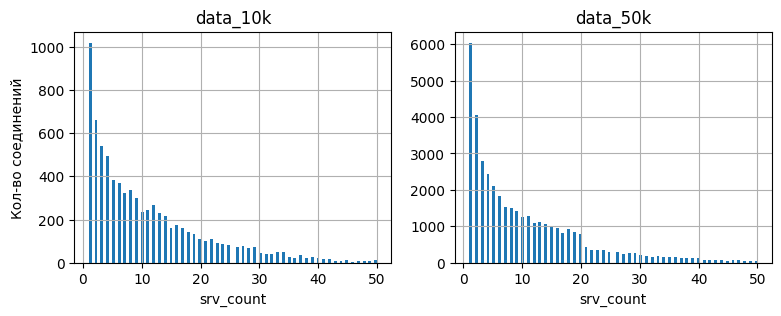

In [33]:
show_info('srv_count')
show_hist('srv_count')
show_hist('srv_count', d1_to=50, d5_to=50)
show_linearly_related('srv_count')

*Комментарий*: большая часть записисей близка к 1. Атакам больше соотвествует значение 511. Полчается, что атрибут взаимозаменяем с   [count](#f22) и хорошо связан с [dst_host_same_src_port_rate](#f35).  
[Перейти к итогам](#fg6)

**24) serror_rate:** <a id="f24"></a>процент соединений, активировавших [flag (3)](#f3) s0, s1, s2 или s3, среди соединений, объединенных в [count (22)](#f22).

In [34]:
show_info('serror_rate')
show_not_zero('serror_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.02,0.0,0.0,0.0,0.0,1.00
[Y=1] data_10k,2213.0,0.00,0.03,0.0,0.0,0.0,0.0,0.94
[Y=0] data_10k,7787.0,0.00,0.02,0.0,0.0,0.0,0.0,1.00
data_50k,50000.0,0.13,0.34,0.0,0.0,0.0,0.0,1.00


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,57.0,0.16,0.20,0.03,0.06,0.10,0.20,1.00
[Y=1] data_10k,2.0,0.88,0.08,0.83,0.86,0.88,0.91,0.94
[Y=0] data_10k,55.0,0.14,0.15,0.03,0.06,0.09,0.18,1.00
data_50k,6735.0,0.98,0.14,0.02,1.00,1.00,1.00,1.00


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**25) srv_serror_rate:** <a id="f25"></a>процент соединений, активировавших [flag (3)](#f3) s0, s1, s2 или s3, среди соединений, объединенных в [srv_count (23)](#f23)

In [35]:
show_info('srv_serror_rate')
show_not_zero('srv_serror_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=0] data_10k,7787.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.13,0.34,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,69.0,0.14,0.21,0.02,0.04,0.08,0.17,1.0
[Y=1] data_10k,2.0,1.00,0.00,1.00,1.00,1.00,1.00,1.0
[Y=0] data_10k,67.0,0.12,0.15,0.02,0.04,0.07,0.13,1.0
data_50k,6772.0,0.97,0.16,0.02,1.00,1.00,1.00,1.0


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**26) rerror_rate:** <a id="f26"></a>процент соединений, активировавших [flag (3)](#f3) REJ, среди соединений, объединенных в [count (22)](#f22).

In [36]:
show_info('rerror_rate')
show_not_zero('rerror_rate', index=[2, 3])

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.03,0.16,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
[Y=0] data_10k,8.0,1.00,0.00,1.00,1.0,1.0,1.0,1.0
data_50k,1546.0,0.88,0.27,0.08,1.0,1.0,1.0,1.0


*Комментарий*: в данном атрибуте нельзя выявить атаку.  
[Перейти к итогам](#fg6)

**27) srv_rerror_rate:** <a id="f27"></a>процент соединений, активировавших [flag (3)](#f3) REJ, среди соединений, объединенных в [srv_count (23)](#f23).

In [37]:
show_info('srv_rerror_rate')
show_not_zero('srv_rerror_rate', index=[2, 3])

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.03,0.16,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
[Y=0] data_10k,8.0,1.00,0.00,1.00,1.00,1.0,1.0,1.0
data_50k,2013.0,0.74,0.35,0.04,0.33,1.0,1.0,1.0


*Комментарий*: в данном атрибуте нельзя выявить атаку.  
[Перейти к итогам](#fg6)

**28) same_srv_rate:** <a id="f28"></a>процент соединений с одним и тем же сервисом среди соединений, объединенных в [count (22)](#f22).

In [38]:
show_info('same_srv_rate')
show_not_one('same_srv_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,1.00,0.03,0.33,1.0,1.0,1.0,1.0
[Y=1] data_10k,2213.0,1.00,0.00,0.83,1.0,1.0,1.0,1.0
[Y=0] data_10k,7787.0,1.00,0.04,0.33,1.0,1.0,1.0,1.0
data_50k,50000.0,0.88,0.32,0.00,1.0,1.0,1.0,1.0


**Если убрать единичные значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,45.0,0.58,0.21,0.33,0.50,0.50,0.67,0.99
[Y=1] data_10k,2.0,0.88,0.08,0.83,0.86,0.88,0.91,0.94
[Y=0] data_10k,43.0,0.57,0.20,0.33,0.50,0.50,0.50,0.99
data_50k,6725.0,0.08,0.12,0.00,0.03,0.06,0.09,0.99


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**29) diff_srv_rate:** <a id="f29"></a>процент соединений с разными сервисами, среди соединений, объединенных в [count (22)](#f22).

In [39]:
show_info('diff_srv_rate')
show_not_zero('diff_srv_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.06,0.0,0.0,0.0,0.0,1.00
[Y=1] data_10k,2213.0,0.00,0.01,0.0,0.0,0.0,0.0,0.33
[Y=0] data_10k,7787.0,0.00,0.06,0.0,0.0,0.0,0.0,1.00
data_50k,50000.0,0.01,0.07,0.0,0.0,0.0,0.0,1.00


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,45.0,0.74,0.37,0.03,0.67,1.00,1.00,1.00
[Y=1] data_10k,2.0,0.22,0.15,0.12,0.17,0.22,0.28,0.33
[Y=0] data_10k,43.0,0.77,0.36,0.03,0.67,1.00,1.00,1.00
data_50k,6758.0,0.09,0.16,0.01,0.06,0.06,0.07,1.00


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**30) srv_diff_host_rate:** <a id="f30"></a>процент соединений с разными машинами назначения среди соединений, объединенных в [srv_count (23)](#f23).

In [40]:
show_info('srv_diff_host_rate')
show_not_zero('srv_diff_host_rate', index=[2, 3])

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.10,0.23,0.0,0.0,0.0,0.08,1.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.00,0.0
[Y=0] data_10k,7787.0,0.12,0.25,0.0,0.0,0.0,0.14,1.0
data_50k,50000.0,0.10,0.24,0.0,0.0,0.0,0.04,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
[Y=0] data_10k,2839.0,0.34,0.31,0.03,0.12,0.20,0.43,1.0
data_50k,12838.0,0.38,0.35,0.01,0.12,0.22,0.67,1.0


*Комментарий*: в данном атрибуте нельзя выявить атаку.  
[Перейти к итогам](#fg6)

#### 2.2.5. Особенности трафика на основе хоста в векторе сетевого соединения <a id="fg5"></a>

**31) dst_host_count:** <a id="f31"></a>количество соединений с одинаковым IP-адресом хоста назначения.

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,150.88,106.20,1.0,34.0,178.0,255.0,255.0
[Y=1] data_10k,2213.0,254.07,13.32,1.0,255.0,255.0,255.0,255.0
[Y=0] data_10k,7787.0,121.56,102.71,1.0,23.0,84.0,255.0,255.0
data_50k,50000.0,171.09,102.45,0.0,57.0,255.0,255.0,255.0


**Наиболее линейно-зависимые атрибуты к "dst_host_count":**

,dst_host_srv_diff_host_rate,count,srv_count,dst_host_same_src_port_rate,dst_host_srv_count
data_10k,-0.59,0.53,0.53,0.35,0.23


,count,dst_host_srv_diff_host_rate,srv_count,dst_host_srv_serror_rate,srv_serror_rate
data_50k,0.49,-0.42,0.39,0.31,0.31


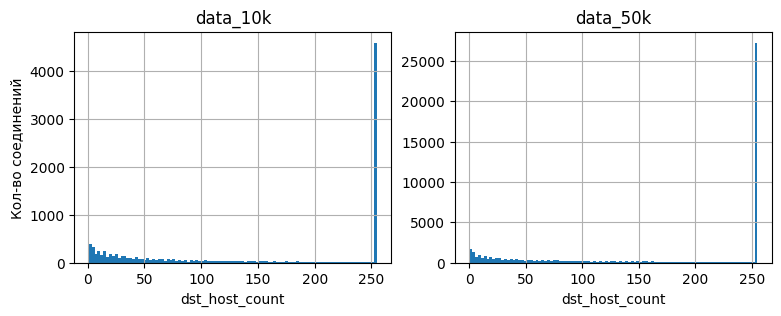

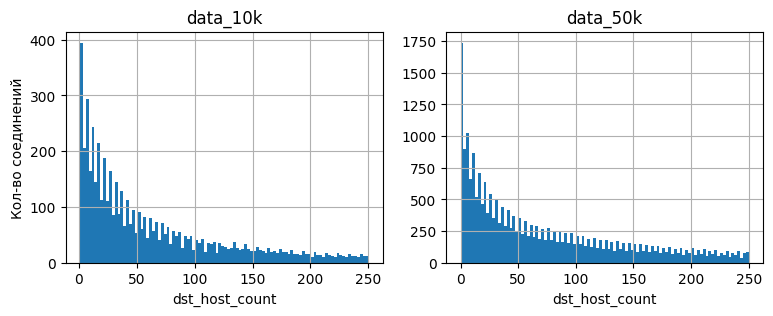

In [41]:
show_info('dst_host_count')
show_hist('dst_host_count')
show_hist('dst_host_count', d1_to=250, d5_to=250)
show_linearly_related('dst_host_count')

*Комментарий*: атрибут в основном имеет тенденцию к небольшому количеству соединений с одинаковым IP-адресом хоста назначения, в среднем 150-170, при этом если значение достигает 255, то с наибольшей вероятностью это была атака.  
[Перейти к итогам](#fg6)

**32) dst_host_srv_count:** <a id="f32"></a>количество соединений с одинаковым номером порта.

In [42]:
show_info('dst_host_srv_count')
display(Markdown('**Если убрать значение 255:**'))
show_not_value('dst_host_srv_count', value=255)

**Тип:** числовое значение (int64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,240.94,48.19,1.0,255.0,255.0,255.0,255.0
[Y=1] data_10k,2213.0,252.84,20.45,2.0,255.0,255.0,255.0,255.0
[Y=0] data_10k,7787.0,237.56,53.03,1.0,255.0,255.0,255.0,255.0
data_50k,50000.0,200.72,94.24,0.0,175.0,255.0,255.0,255.0


**Если убрать значение 255:**

,count,mean,std,min,25%,50%,75%,max
data_10k,1206.0,138.39,85.45,1.0,48.25,157.5,219.00,253.0
[Y=1] data_10k,32.0,105.28,83.85,2.0,21.25,98.0,175.50,253.0
[Y=0] data_10k,1174.0,139.29,85.34,1.0,50.00,161.5,219.00,253.0
data_50k,15104.0,75.31,82.85,0.0,10.00,21.0,137.25,254.0


*Комментарий*: только 32 записи соответствуют атаке и возможно атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**33) dst_host_same_srv_rate:** <a id="f33"></a>процент соединений с одним и тем же сервисом среди соединений, объединенных в [dst_host_count (31)](#f31).

In [43]:
show_info('dst_host_same_srv_rate')
show_not_one('dst_host_same_srv_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.98,0.11,0.00,1.0,1.0,1.0,1.0
[Y=1] data_10k,2213.0,0.99,0.06,0.02,1.0,1.0,1.0,1.0
[Y=0] data_10k,7787.0,0.97,0.12,0.00,1.0,1.0,1.0,1.0
data_50k,50000.0,0.82,0.35,0.00,1.0,1.0,1.0,1.0


**Если убрать единичные значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,727.0,0.71,0.29,0.00,0.58,0.81,0.95,0.99
[Y=1] data_10k,27.0,0.50,0.29,0.02,0.29,0.48,0.74,0.99
[Y=0] data_10k,700.0,0.71,0.29,0.00,0.61,0.82,0.95,0.99
data_50k,12324.0,0.28,0.33,0.00,0.04,0.07,0.55,0.99


*Комментарий*: только 27 записей соответствуют атаке и возможно атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**34) dst_host_diff_srv_rate:** <a id="f34"></a>процент соединений с разными сервисами среди соединений, объединенных в [dst_host_count (31)](#f31).

In [44]:
show_info('dst_host_diff_srv_rate')
show_not_zero('dst_host_diff_srv_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.00,1.00
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.00,0.06
[Y=0] data_10k,7787.0,0.01,0.04,0.0,0.0,0.0,0.00,1.00
data_50k,50000.0,0.02,0.08,0.0,0.0,0.0,0.01,1.00


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,727.0,0.07,0.10,0.01,0.02,0.04,0.07,1.00
[Y=1] data_10k,27.0,0.01,0.01,0.01,0.01,0.01,0.02,0.06
[Y=0] data_10k,700.0,0.07,0.10,0.01,0.02,0.04,0.08,1.00
data_50k,12555.0,0.08,0.14,0.01,0.03,0.07,0.07,1.00


*Комментарий*: только 27 записей соответствуют атаке и возможно атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**35) dst_host_same_src_port_rate:** <a id="f35"></a>процент соединений с одним и тем же портом источника среди соединений, объединенных в [dst_host_srv_count (32)](#f32).

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.27,0.41,0.00,0.0,0.03,0.50,1.0
[Y=1] data_10k,2213.0,0.99,0.07,0.01,1.0,1.00,1.00,1.0
[Y=0] data_10k,7787.0,0.07,0.17,0.00,0.0,0.01,0.05,1.0
data_50k,50000.0,0.25,0.40,0.00,0.0,0.01,0.33,1.0


**Наиболее линейно-зависимые атрибуты к "dst_host_same_src_port_rate":**

,count,srv_count,src_bytes,dst_host_count,dst_host_srv_diff_host_rate
data_10k,0.92,0.92,0.36,0.35,-0.21


,srv_count,count,dst_host_same_srv_rate,same_srv_rate,dst_host_srv_count
data_50k,0.87,0.79,0.25,0.24,0.23


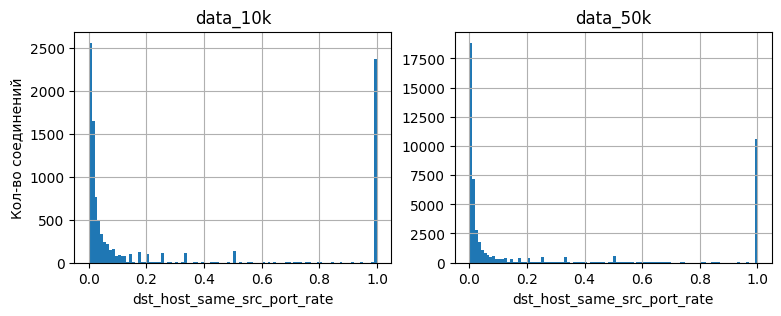

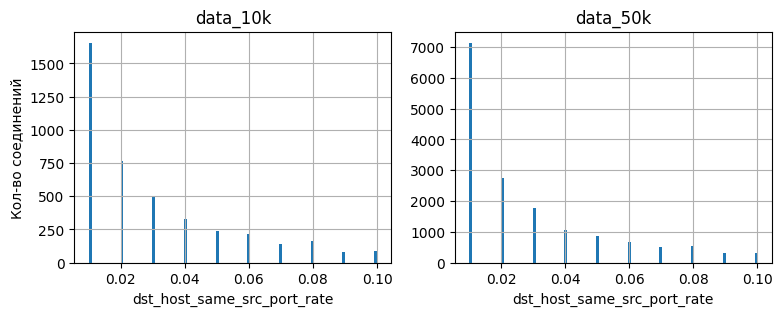

In [45]:
show_info('dst_host_same_src_port_rate')
show_hist('dst_host_same_src_port_rate')
show_hist('dst_host_same_src_port_rate', d1_from=0.01, d5_from=0.01, d1_to=0.1, d5_to=0.1)
show_linearly_related('dst_host_same_src_port_rate')

*Комментарий*: атрибут склонен к отсутствию соединений с одним и тем же портом источника. При этом имеется значительная связь с [count](#f22) и [srv_count](#f23). Если значение достигает 1, то скорее всего произошла атака.  
[Перейти к итогам](#fg6)

**36) dst_host_srv_diff_host_rate:** <a id="f36"></a>процент соединений с разными машинами назначения среди соединений, объединенных в [dst_host_srv_count (32)](#f32).

In [46]:
show_info('dst_host_srv_diff_host_rate')
show_not_zero('dst_host_srv_diff_host_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.02,0.03,0.0,0.0,0.01,0.03,1.00
[Y=1] data_10k,2213.0,0.00,0.02,0.0,0.0,0.00,0.00,0.67
[Y=0] data_10k,7787.0,0.02,0.03,0.0,0.0,0.02,0.04,1.00
data_50k,50000.0,0.02,0.07,0.0,0.0,0.00,0.02,1.00


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,5036.0,0.04,0.03,0.01,0.02,0.03,0.05,1.00
[Y=1] data_10k,5.0,0.38,0.21,0.12,0.30,0.33,0.50,0.67
[Y=0] data_10k,5031.0,0.04,0.03,0.01,0.02,0.03,0.05,1.00
data_50k,20177.0,0.06,0.11,0.01,0.02,0.03,0.05,1.00


*Комментарий*: только 5 записей соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**37) dst_host_serror_rate:** <a id="f37"></a>процент соединений, активировавших [flag (3)](#f3) s0, s1, s2 или s3, среди соединений, объединенных в [dst_host_count (31)](#f31).

In [47]:
show_info('dst_host_serror_rate')
show_not_zero('dst_host_serror_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=0] data_10k,7787.0,0.00,0.02,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.13,0.34,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,273.0,0.04,0.12,0.01,0.01,0.01,0.02,1.0
[Y=1] data_10k,2.0,1.00,0.00,1.00,1.00,1.00,1.00,1.0
[Y=0] data_10k,271.0,0.04,0.09,0.01,0.01,0.01,0.02,1.0
data_50k,7607.0,0.86,0.34,0.01,1.00,1.00,1.00,1.0


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**38) dst_host_srv_serror_rate:** <a id="f38"></a>процент соединений, активировавших [flag (3)](#f3) s0, s1, s2 или s3, среди соединений, объединенных в [dst_host_srv_count (32)](#f32).

In [48]:
show_info('dst_host_srv_serror_rate')
show_not_zero('dst_host_srv_serror_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.02,0.0,0.0,0.0,0.0,0.94
[Y=1] data_10k,2213.0,0.00,0.03,0.0,0.0,0.0,0.0,0.94
[Y=0] data_10k,7787.0,0.00,0.01,0.0,0.0,0.0,0.0,0.84
data_50k,50000.0,0.13,0.34,0.0,0.0,0.0,0.0,1.00


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,178.0,0.03,0.11,0.01,0.01,0.01,0.01,0.94
[Y=1] data_10k,2.0,0.88,0.08,0.83,0.86,0.88,0.91,0.94
[Y=0] data_10k,176.0,0.02,0.07,0.01,0.01,0.01,0.01,0.84
data_50k,7495.0,0.88,0.33,0.01,1.00,1.00,1.00,1.00


*Комментарий*: только 2 записи соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

**39) dst_host_rerror_rate:** <a id="f39"></a>процент соединений, активировавших [flag (3)](#f3) REJ, среди соединений, объединенных в [dst_host_count (31)](#f31).

In [49]:
show_info('dst_host_rerror_rate')
show_not_zero('dst_host_rerror_rate', index=[2, 3])

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0
[Y=0] data_10k,7787.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.03,0.16,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
[Y=0] data_10k,15.0,0.55,0.50,0.01,0.03,1.00,1.0,1.0
data_50k,3671.0,0.39,0.44,0.01,0.04,0.05,1.0,1.0


*Комментарий*: в данном атрибуте нельзя выявить атаку.  
[Перейти к итогам](#fg6)

**40) dst_host_srv_rerror_rate:** <a id="f40"></a>процент соединений, активировавших [flag (3)](#f3) REJ, среди соединений, объединенных в [dst_host_srv_count (32)](#f32).

In [50]:
show_info('dst_host_srv_rerror_rate')
show_not_zero('dst_host_srv_rerror_rate')

**Тип:** числовое значение (float64).

,count,mean,std,min,25%,50%,75%,max
data_10k,10000.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
[Y=1] data_10k,2213.0,0.00,0.00,0.0,0.0,0.0,0.0,0.1
[Y=0] data_10k,7787.0,0.00,0.03,0.0,0.0,0.0,0.0,1.0
data_50k,50000.0,0.03,0.15,0.0,0.0,0.0,0.0,1.0


**Если убрать нулевые значения:**

,count,mean,std,min,25%,50%,75%,max
data_10k,10.0,0.84,0.35,0.10,1.00,1.00,1.00,1.0
[Y=1] data_10k,1.0,0.10,NaN,0.10,0.10,0.10,0.10,0.1
[Y=0] data_10k,9.0,0.92,0.25,0.25,1.00,1.00,1.00,1.0
data_50k,3512.0,0.39,0.45,0.01,0.04,0.05,0.98,1.0


*Комментарий*: только 1 запись соответствуют атаке и скорее всего атрибут не информативен для обучения.  
[Перейти к итогам](#fg6)

#### 2.2.6. Общий итог по анализу данных <a id="fg6"></a>

Примем сокращения:
* d1 - размеченный набор данных (data_10k);
* y1 - набор data_10k с атакой ([Y=1] data_10k);
* y0 - набор data_10k без атаки ([Y=0] data_10k);
* d5 - неразмеченный набор данных (data_50k).

Для формирования наборов можно не рассматривать атрибуты:
* не имеющие уникальных значений ([land](#f6), [su_attempted](#f14), [num_outbound_cmds](#f19), [is_host_login](#f20));
* не являющиейся достаточно информативными ([root_shell](#f13), [is_guest_login](#f21)).

Также с большей вероятностью, можно не рассматривать атрибуты:
* с малым количеством атак при ненулевых значениях:

|Атрибут|y1|y0|d5|
|-|:-:|:-:|:-:|
|[duration](#f0)|4|265|1 650|
|[hot](#f9)|3|44|2214|
|[num_compromised](#f12)|3|2|1 955|
|[num_root](#f15)|1|1|178|
|[num_file_creations](#f16)|4|6|75|
|[num_shells](#f17)|2|0|11|
|[serror_rate](#f24)|2|55|6 735|
|[srv_serror_rate](#f25)|2|67|6 772|
|[diff_srv_rate](#f29)|2|43|6 758|
|[dst_host_diff_srv_rate](#f34)|27|700|12 555|
|[dst_host_srv_diff_host_rate](#f36)|5|5031|20 177|
|[dst_host_serror_rate](#f37)|2|271|7 607|
|[dst_host_srv_serror_rate](#f38)|2|176|7 495|
|[dst_host_srv_rerror_rate](#f40)|1|9|3 512|

* с малым количеством атак при неединичных значениях:

|Атрибут|y1|y0|d5|
|-|:-:|:-:|:-:|
|[same_srv_rate](#f28)|2|43|6 725|
|[dst_host_same_srv_rate](#f33)|27|700|12 324|

* с малым количеством атак при отсутствии значения 255:

|Атрибут|y1|y0|d5|
|-|:-:|:-:|:-:|
|[dst_host_srv_count](#f32)|32|1 174|15 104|

* с отсутствием атак при ненулевых значениях:

|Атрибут|y0|d5|
|-|:-:|:-:|
|[num_access_files](#f18)|10|163|
|[rerror_rate](#f26)|8|1 546|
|[srv_rerror_rate](#f27)|8|2 013|
|[srv_diff_host_rate](#f30)|2 839|12 838|
|[dst_host_rerror_rate](#f39)|15|3 671|

* не имеющие уникальных значений в data_10k, но содержащих немного ненулевых данных в data_50k:

|Атрибут|d5|
|-|:-:|
|[wrong_fragment](#f7)|119|
|[urgent](#f8)|2|
|[num_failed_logins](#f10)|57|

Под сомнением остаются атрибуты:
* [protocol_type](#f1) - с атакой в основном связаны ICMP-пакеты;
* [service](#f2) - с атакой в основном связана служба ecr_i;
* [flag](#f3) - с атакой в основном связан флаг SF.

Тогда остаются атрибуты:
* Основные: [src_bytes](#f4), [dst_bytes](#f5);
* Контентные: [logged_in](#f11), [root_shell](#f13);
* Временные: [count](#f22), [srv_count](#f23);
* Хостовые: [dst_host_count](#f31), [dst_host_same_src_port_rate](#f35).

Все они (кроме логических: [logged_in](#f11), [root_shell](#f13)) имеют значения с очень большой величиной, по сравнению с остальным числами.

Сильной линейной связью (0.9-1.0) обладают:
* [count](#f22) - [srv_count](#f23) (d1 - 1.0, d5 - 0.94);
* [count](#f22) - [dst_host_same_src_port_rate](#f35) (d1 - 0.92);
* [srv_count](#f23) - [dst_host_same_src_port_rate](#f35) (d1 - 0.92).

Высокой линейной связью (0.7-0.9) обладают:
* [count](#f22) - [dst_host_same_src_port_rate](#f35) (d5 - 0.79);
* [srv_count](#f23) - [dst_host_same_src_port_rate](#f35) (d5 - 0.87).

## N. Выводы <a id="conclusions"></a>



TO DO

## N. Список литературы <a id="references"></a>
1. Подготовленные данные (https://github.com/Demetrey/DMaP/tree/CP/CP/datasets); <a id="l1"></a>
2. Датасет NSL-KDD (https://github.com/defcom17/NSL_KDD); <a id="l2"></a>
3. Е.М. Бурлаков Применение метода анализа соответствий для оптимизации комбинаций атрибутов у наборов данных. Вестник ПНИПУ. Электротехника, информационные технологии, системы управления №26, 2018; <a id="l3"></a>
4. L.Dhanabal, S.P. Shantharajah.  A Study on NSL-KDD Dataset for Intrusion Detection System Based on Classification Algorithms (https://e-tarjome.com/storage/btn_uploaded/2019-07-13/1563006133_9702-etarjome-English.pdf). <a id="l4"></a>